# Fitting a multimodal beta distribution with MCMC

This follows on from a similar post fitting a multimodal distribution with gradient descent.
This time around we fit with MCMC using PyMC.

Outline:
*   Generate random multimodal data
*   Use a Bernouli trial to suggest which beta distribution to sample from
*   Fit with PyMC

## Generate random data

I'll make random data from two beta distributions and then select from them randomly to get two peaks.
I'll deliberately make the distributions fairly distinct to make the initial analysis easier to visualise.

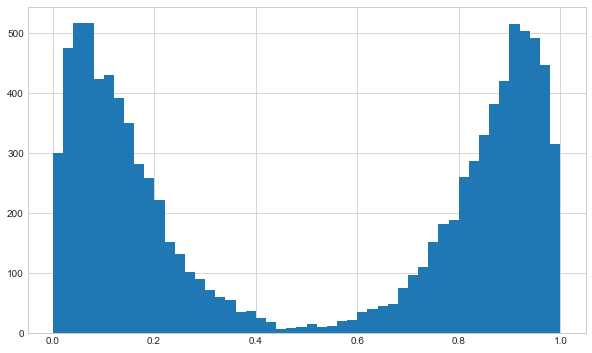

In [33]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-whitegrid")

# true distribution parameters
p_d1 = 0.5
b1_param = (10, 1.5)
b2_param = (1.5, 10)

n = 10000
rand_gen = np.random.default_rng(seed=0)

mix_samples = rand_gen.binomial(n=1, p=p_d1, size=(n, 1))
b1_samples = rand_gen.beta(a=b1_param[0], b=b1_param[1], size=(n, 1))
b2_samples = rand_gen.beta(a=b2_param[0], b=b2_param[1], size=(n, 1))

rand_samples = mix_samples * b1_samples + (1 - mix_samples) * b2_samples

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(rand_samples, bins=50)
plt.show()


## Fit with pymc

In [53]:
import pymc3 as pm

# X, y = linear_training_data()

# beta1 = pm.Beta(aplha, beta)
# beta2 = pm.Beta(aplha, beta)
# mix = pm.Bernoulli(p=0.5)


# with pm.Model() as linear_model:
#     alpha1 = pm.Uniform("alpha1", lower=0, upper=20)
#     beta1 = pm.Uniform("beta1", lower=0, upper=20)
#     alpha2 = pm.Uniform("alpha2", lower=0, upper=20)
#     beta2 = pm.Uniform("beta2", lower=0, upper=20)

#     # w = pm.Uniform("w", lower=0, upper=1)
#     b1 = pm.Beta.dist(alpha=alpha1, beta=beta1)
#     b2 = pm.Beta.dist(alpha=alpha2, beta=beta2)
#     # b1 = pm.Beta(name='beta_dist1',alpha=alpha1, beta=beta1)
#     # b2 = pm.Beta(name='beta_dist2',alpha=alpha2, beta=beta2)

#     w = pm.Dirichlet('w', a=np.array([1, 1]))
    
#     mix = pm.Mixture("mix", w=w, comp_dists=[b1, b2], observed=rand_samples)

#     trace = pm.sample(draws=1000, return_inferencedata=True)

# model = pm.Model()
# with model:
#     alpha1 = pm.Uniform("alpha1", lower=0, upper=20)
#     beta1 = pm.Uniform("beta1", lower=0, upper=20)
#     alpha2 = pm.Uniform("alpha2", lower=0, upper=20)
#     beta2 = pm.Uniform("beta2", lower=0, upper=20)
#     w = pm.Uniform("w", lower=0, upper=1)
#     b1 = pm.Beta.dist(alpha=alpha1, beta=beta1)
#     b2 = pm.Beta.dist(alpha=alpha2, beta=beta2)
#     mix = pm.Mixture("mix", w=[1.0, w], comp_dists=[b1, b2])
#     trace = pm.sample(draws=1000, return_inferencedata=True)

    # # priors
    # alpha_priors = pm.Flat(alpha=10, beta=1.5)
    # beta_priors = pm.Flat(alpha=10, beta=1.5)
    
    # beta1 = pm.Beta.dist(alpha=alpha_priors[0], beta=beta_priors[0])
    # beta2 = pm.Beta.dist(alpha=alpha_priors[1], beta=beta_priors[1])
    # # mix = pm.Bernoulli(name="mix", p=0.5)
    # # mix = pm.Binomial('mix', n=len(rand_samples), p=0.5)

    # mix = pm.Dirichlet('mix', a=np.array([1, 1]))

    # # likelihood
    # like = pm.Mixture('like', w=mix, comp_dists = [beta1, beta2], observed=rand_samples)

# prior = pm.sample_prior_predictive()
# posterior_pred = pm.sample_posterior_predictive(posterior)



# npop-Mixture of multidimensional Gaussian
npop = 2
nd = (n, 1)
with pm.Model() as model:
    mu = pm.Normal('mu', mu=np.arange(npop), sigma=1, shape=npop) # Each component has an independent mean
    components = pm.Normal.dist(mu=mu, sigma=1, shape=nd + (npop,))  # nd + (npop,) shaped multinomial

    w = pm.Dirichlet('w', a=np.ones(npop))

    like = pm.Mixture('like', w=w, comp_dists = components, observed=rand_samples, shape=nd)  # The resulting mixture is nd-shaped

    trace = pm.sample(draws=50, return_inferencedata=True)


Only 50 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w, mu]


Sampling 4 chains for 1_000 tune and 50 draw iterations (4_000 + 200 draws total) took 46 seconds.
/Users/Rich/Developer/miniconda3/envs/pymc_env/lib/python3.9/site-packages/pymc3/sampling.py:643: UserWarning: The number of samples is too small to check convergence reliably.
  warnings.warn("The number of samples is too small to check convergence reliably.")
There were 18 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.18147224440267562, but should be close to 0.8. Try to increase the number of tuning steps.
There were 23 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.10267392986283795, but should be close to 0.8. Try to increase the number of tuning steps.


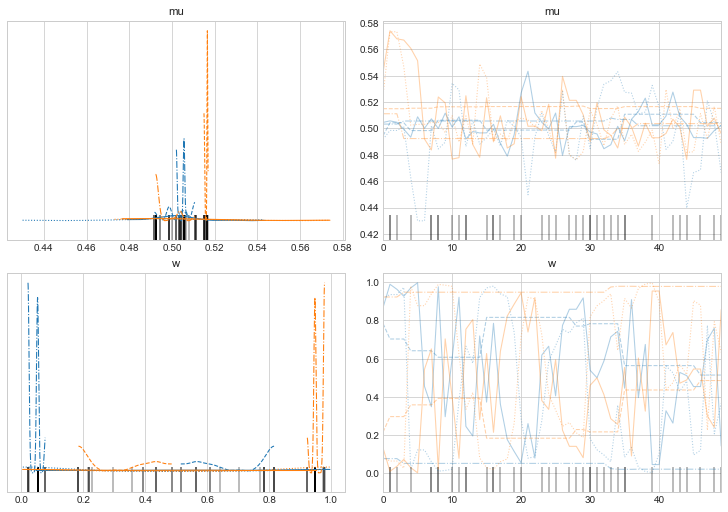

In [54]:
import arviz as az
az.plot_trace(trace, figsize=(10, 7));

In [62]:
with pm.Model() as linear_model:
    alpha1 = pm.Uniform("alpha1", lower=0, upper=20, shape=(4,1))
alpha1.random()

array([[ 0.79094524],
       [ 4.04031895],
       [15.53454244],
       [ 4.16157674]])

In [76]:
alpha1 = pm.Uniform.dist(lower=0, upper=20, shape=(4,1))
alpha1.random()
alpha1.logp([3, 1]).eval()

array([-2.99573227, -2.99573227])

## Fit single beta


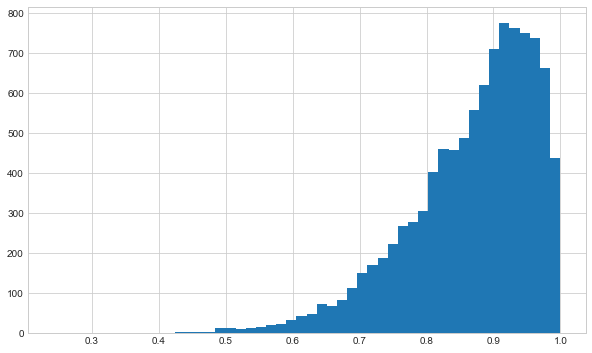

In [26]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-whitegrid")

# true distribution parameters
b1_param = (10, 1.5)

n = 10000
rand_gen = np.random.default_rng(seed=0)

rand_samples = rand_gen.beta(a=b1_param[0], b=b1_param[1], size=(n, 1))

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(rand_samples, bins=50)
plt.show()


In [31]:
import pymc3 as pm

with pm.Model() as linear_model:
    alpha1 = pm.Uniform("alpha1", lower=0, upper=20)
    beta1 = pm.Uniform("beta1", lower=0, upper=20)
    b1 = pm.Beta(name="beta", alpha=alpha1, beta=beta1, observed=rand_samples)
    trace = pm.sample(draws=1000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta1, alpha1]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 23 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [30]:
posterior

<MultiTrace: 4 chains, 1000 iterations, 4 variables>

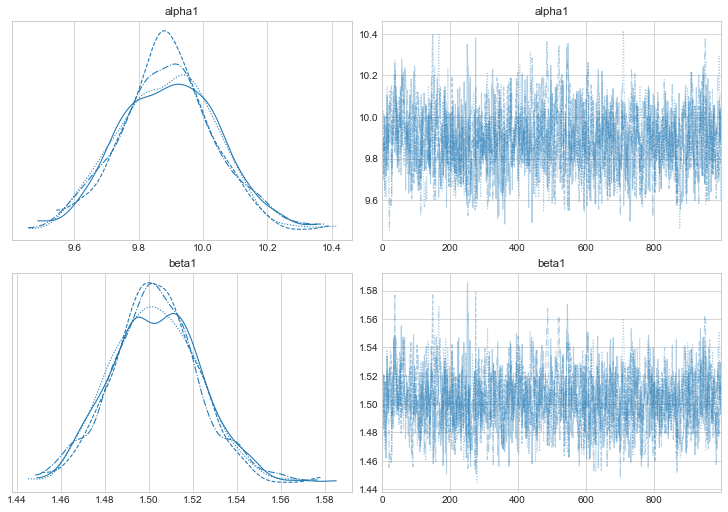

In [32]:
# return_inferencedata=True
import arviz as az
az.plot_trace(trace, figsize=(10, 7));

In [10]:
import pandas as pd

RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)

size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + rng.normal(scale=0.5, size=size)

data = pd.DataFrame(dict(x=x, y=y))
data

,x,y
0,0.000000,0.888679
1,0.005025,1.672880
2,0.010050,0.734615
3,0.015075,1.364275
4,0.020101,1.612892
...,...,...
195,0.979899,2.774799
196,0.984925,4.721245
197,0.989950,3.650920
198,0.994975,2.462356


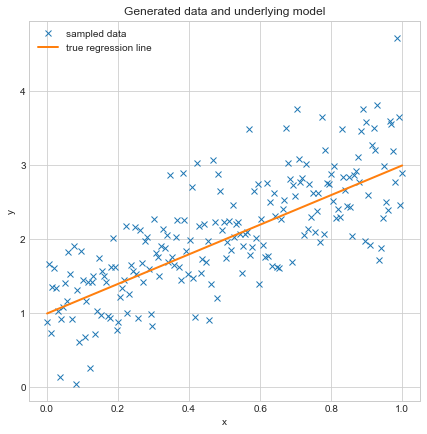

In [13]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
ax.plot(x, y, "x", label="sampled data")
ax.plot(x, true_regression_line, label="true regression line", lw=2.0)
plt.legend(loc=0);

In [15]:
with pm.Model() as model:  # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = pm.HalfCauchy("sigma", beta=10, testval=1.0)
    intercept = pm.Normal("Intercept", 0, sigma=20)
    x_coeff = pm.Normal("x", 0, sigma=20)

    # Define likelihood
    likelihood = pm.Normal("y", mu=intercept + x_coeff * x, sigma=sigma, observed=y)

    # Inference!
    # draw 3000 posterior samples using NUTS sampling
    trace = pm.sample(3000, return_inferencedata=True)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x, Intercept, sigma]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 33 seconds.


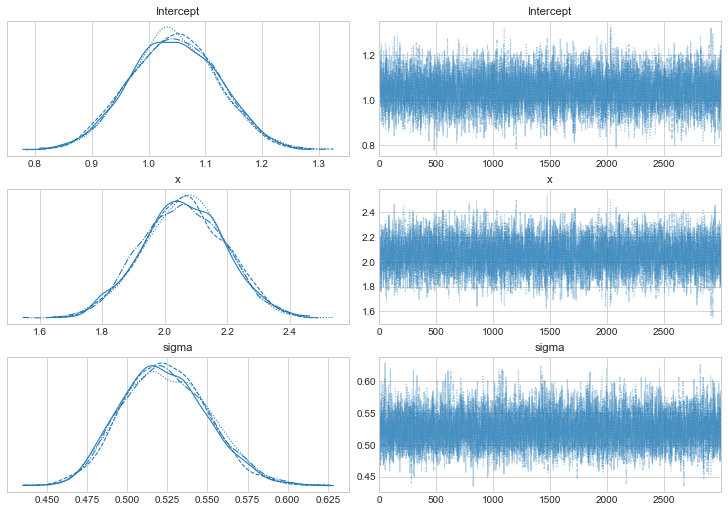

In [17]:
import arviz as az
az.plot_trace(trace, figsize=(10, 7));

/Users/Rich/Developer/miniconda3/envs/pymc_env/lib/python3.9/site-packages/pymc3/plots/posteriorplot.py:59: DeprecationWarning: The `plot_posterior_predictive_glm` function will migrate to Arviz in a future release. 
Keep up to date with `ArviZ <https://arviz-devs.github.io/arviz/>`_ for future updates.
  warnings.warn(


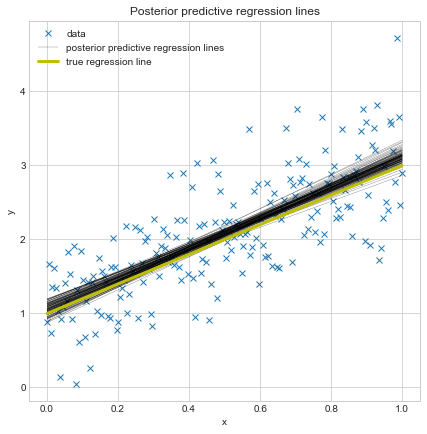

In [18]:
plt.figure(figsize=(7, 7))
plt.plot(x, y, "x", label="data")
pm.plot_posterior_predictive_glm(trace, samples=100, label="posterior predictive regression lines")
plt.plot(x, true_regression_line, label="true regression line", lw=3.0, c="y")

plt.title("Posterior predictive regression lines")
plt.legend(loc=0)
plt.xlabel("x")
plt.ylabel("y");

In [ ]:
beta_params_norm = torch.nn.functional.softplus(self.beta_params)
mixture_prob_norm = torch.nn.functional.softmax(self.mixture_prob, dim=0)

mix = torch.distributions.Categorical(mixture_prob_norm)
comp = torch.distributions.Beta(beta_params_norm[:, 0], beta_params_norm[:, 1])
mixture_dist = torch.distributions.MixtureSameFamily(mix, comp)

## Creating a PyTorch model

Assuming we know the underlying generating model (...strong assumption...?), we can construct a network that builds the equivalent distribution objects in PyTorch.

We are fitting the distribution parameters.
As such we have no input features for the forward pass, only the output values.
We use negative log likelihood as the loss function to optimise.

In [2]:
import pytorch_lightning as pl
import torch


class BetaMixModel(pl.LightningModule):
    def __init__(
        self,
        learning_rate=1e-3,
    ):
        super().__init__()

        self.beta_1_params = torch.nn.Parameter(torch.randn((2)))
        self.beta_2_params = torch.nn.Parameter(torch.randn((2)))
        self.beta_params = torch.nn.Parameter(torch.randn((2, 2)))
        self.mixture_prob = torch.nn.Parameter(torch.randn((2)))

        self.train_log_error = []
        self.val_log_error = []
        self.learning_rate = learning_rate

    def forward(self):
        # ensure correct domain for params
        beta_params_norm = torch.nn.functional.softplus(self.beta_params)
        mixture_prob_norm = torch.nn.functional.softmax(self.mixture_prob, dim=0)

        mix = torch.distributions.Categorical(mixture_prob_norm)
        comp = torch.distributions.Beta(beta_params_norm[:, 0], beta_params_norm[:, 1])
        mixture_dist = torch.distributions.MixtureSameFamily(mix, comp)

        return mixture_dist

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(
            self.parameters(),
            lr=self.learning_rate,
        )
        return optimizer

    def training_step(self, batch, batch_idx):
        y = batch[0]

        mixture_dist = self.forward()

        negloglik = -mixture_dist.log_prob(y)
        loss = torch.mean(negloglik)

        self.train_log_error.append(loss.detach().numpy())
        return loss

    def validation_step(self, batch, batch_idx):
        y = batch[0]

        mixture_dist = self.forward()

        negloglik = -mixture_dist.log_prob(y)
        loss = torch.mean(negloglik)

        self.train_log_error.append(loss.detach().numpy())
        return loss


I've noticed that training can get stuck in a local minima of loss -0.1.
Here I'm setting the seed before I create the model, to get a set of initial parameters which converge correctly.
This may suggest that the loss surface we are optimising is not too smooth.
Ideally I would train the network multiple times from random starting weights to investigate.

In [3]:
# create model
torch.manual_seed(1)
model = BetaMixModel(learning_rate=1e-0)

Now we can generate distribution objects from the model by calling the forward pass method.

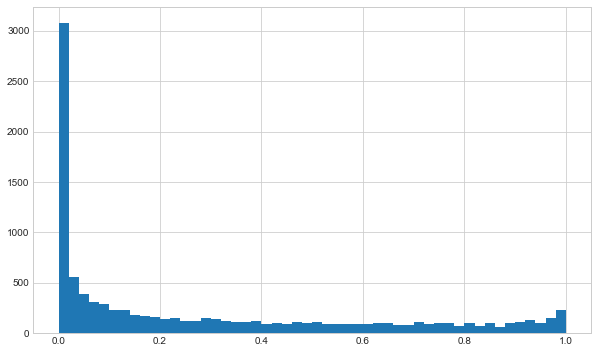

In [4]:
# get some samples
output_dist = model()
output_samples = output_dist.sample((n,1)).numpy()

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(output_samples, bins=50)
plt.show()

## Fitting the model distribution
To train the model with our random sample data created above, we need to setup a dataloader to pass to the trainer.

In [5]:
# training on the whole dataset each batch
from torch.utils.data import TensorDataset, DataLoader

rand_samples_t = torch.Tensor(rand_samples)

dataset_train = TensorDataset(rand_samples_t)
dataloader_train = DataLoader(dataset_train, batch_size=len(rand_samples))

rand_samples_batch = next(iter(dataloader_train))
rand_samples_batch[0].shape

torch.Size([10000, 1])

Now we can train the model via PyTorch Lightning's Trainer object.

In [6]:
# fit network
trainer = pl.Trainer(
    max_epochs=100,
)
trainer.fit(model, dataloader_train)


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/Users/Rich/Developer/miniconda3/envs/pytorch_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:122: UserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn("You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.")
Missing logger folder: /Users/Rich/Developer/Github/VariousDataAnalysis/PyTorchStuff/fitting_multimodal_distributions/lightning_logs

  | Name | Type | Params
------------------------------
------------------------------
10        Trainable params
0         Non-trainable params
10        Total params
0.000     Total estimated model params size (MB)
/Users/Rich/Developer/miniconda3/envs/pytorch_env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:132: UserWarning: The dataloader, train_dataloader, does not have many workers which ma

Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 19.39it/s, loss=-0.414, v_num=0]  


We can see the training loss has converged ok.

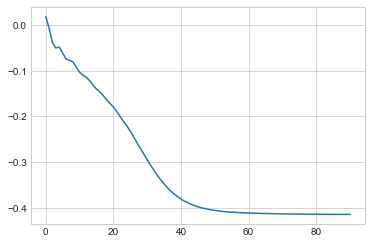

In [7]:
def moving_average(a, n=10):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1 :] / n


plt.plot(moving_average(np.array(model.train_log_error)))


## Checking results
Now we can check the resulting distribution that comes out of our model and compare that directly to the random samples.

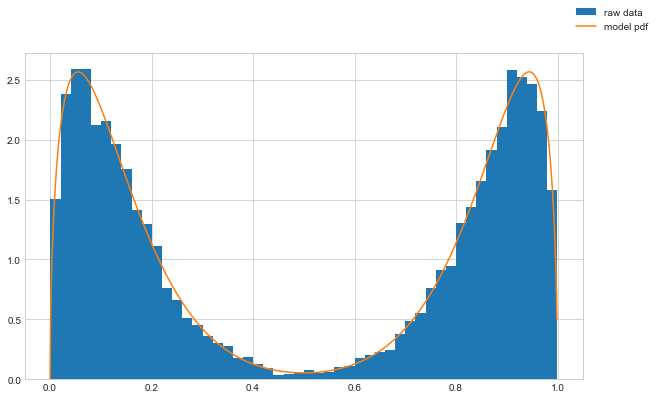

In [8]:
# plot pdf
output_dist = model()
x = torch.arange(0,1,0.001)
y = torch.exp(output_dist.log_prob(x))

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(rand_samples, bins=50, density=True, label='raw data')
ax.plot(x.detach().numpy(), y.detach().numpy(), label='model pdf')
fig.legend()
plt.show()

We can see that the trained distribution parameters now are close to the underlying parameters.

In [9]:
beta_params_norm = torch.nn.functional.softplus(model.beta_params).detach()
mixture_prob_norm = torch.nn.functional.softmax(model.mixture_prob, dim=0).detach()

print(beta_params_norm)
print(mixture_prob_norm)

tensor([[ 1.5257,  9.9830],
        [10.0109,  1.5317]])
tensor([0.4997, 0.5003])


```
b2_param = (1.5, 10)
b1_param = (10, 1.5)
p_d1 = 0.5
```

So seems successful overall!

Pros:

*   This approach makes it quite easy to train fairly complex distributions without having to understand the particular methods for that distribution type
*   Specific fitting procedures may not even exist for many complex distributions

Cons:

*   Potential for non-converging solutions
*   Time required to fit being probably slower than direct methods

Would be interesting to see how well MCMC does with this sort of problem... maybe next time.